In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:

import os
import cv2
import numpy as np

IMAGES_PATH = 'images_conv'

def load_image(image_path):
    """
    Load the image using opencv
    :param image_path: <String> Path of input_image
    :return a numpy array of size [image_height, image_width]
    """
    # Create the Image directory to save any plots
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    # cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image


def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [ ]:
grey_image = load_image('/content/drive/MyDrive/NLP/convolve_images_11/' + IMAGES_PATH + '/cheetah.jpg')

image matrix size:  (630, 1030)

 First 5 columns and rows of the image matrix: 
 [[101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]]


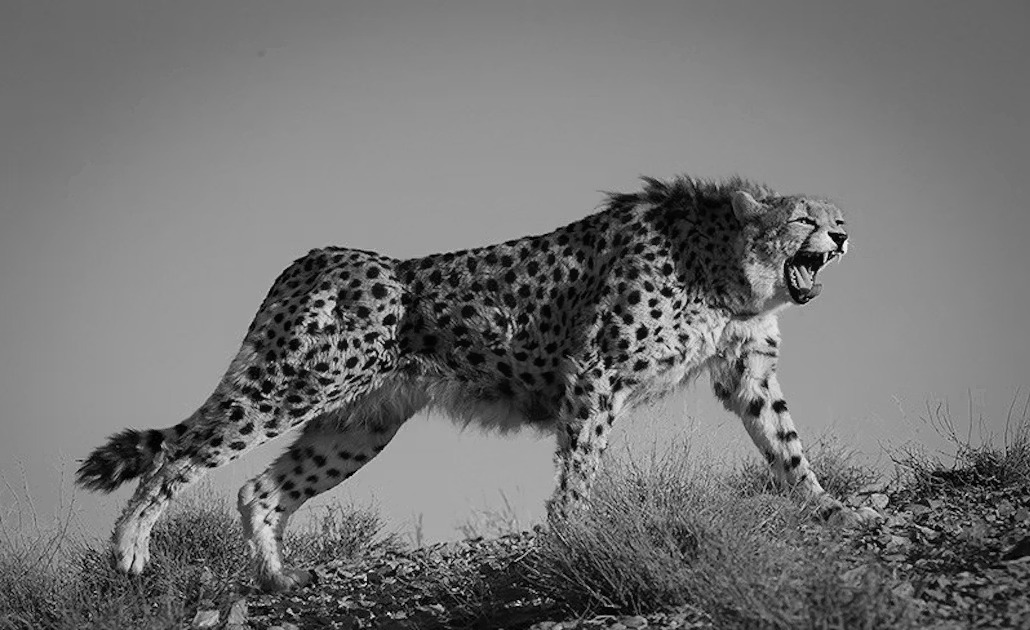

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(grey_image)

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [ ]:
sharpened_convolution = convolve2d(grey_image, kernel)

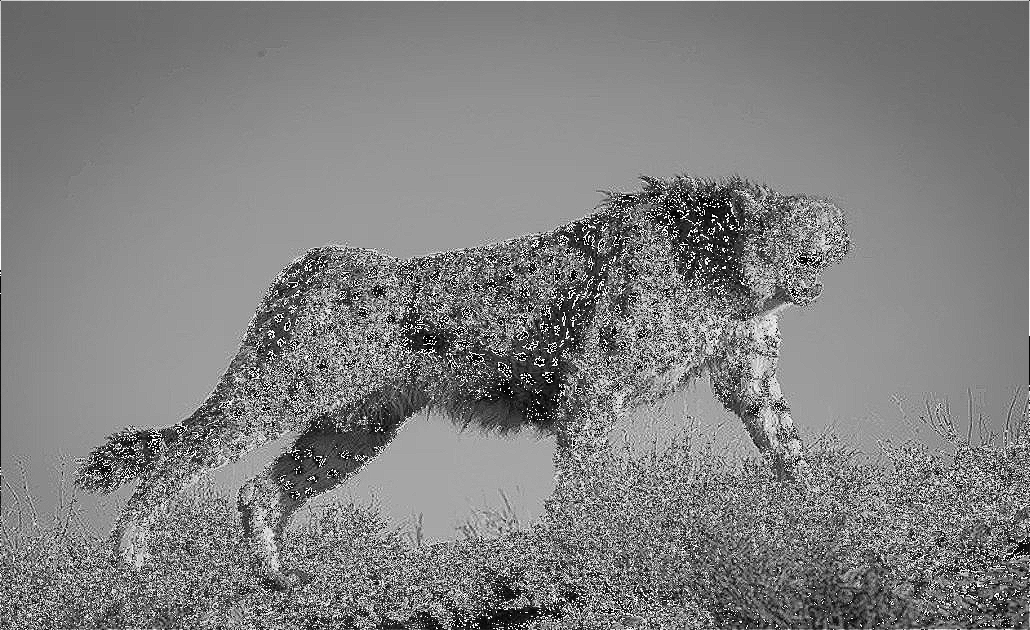

In [ ]:
cv2_imshow(sharpened_convolution)